In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [98]:
# Locating the file
HOME = Path() / '../'
FAO = HOME / 'food-waste-dataset' / 'fao'
DATA = FAO / 'emissions' / 'emissions.csv'
df = pd.read_csv(DATA, encoding='latin-1')

In [99]:
# Variables
for c in df.columns:
    print('->', c)

-> Area Code
-> Area Code (M49)
-> Area
-> Item Code
-> Item
-> Element Code
-> Element
-> Year Code
-> Year
-> Unit
-> Value
-> Flag


In [100]:
# Reading the countries
countries = sorted(df['Area'].unique())
print(f'There are {len(countries)} different countries in the dataset:')
for c in countries:
    print('->', c)

There are 271 different countries in the dataset:
-> Afghanistan
-> Africa
-> Albania
-> Algeria
-> American Samoa
-> Americas
-> Andorra
-> Angola
-> Annex I countries
-> Antigua and Barbuda
-> Argentina
-> Armenia
-> Aruba
-> Asia
-> Australia
-> Australia and New Zealand
-> Austria
-> Azerbaijan
-> Bahamas
-> Bahrain
-> Bangladesh
-> Barbados
-> Belarus
-> Belgium
-> Belgium-Luxembourg
-> Belize
-> Benin
-> Bermuda
-> Bhutan
-> Bolivia (Plurinational State of)
-> Bosnia and Herzegovina
-> Botswana
-> Brazil
-> British Virgin Islands
-> Brunei Darussalam
-> Bulgaria
-> Burkina Faso
-> Burundi
-> Cabo Verde
-> Cambodia
-> Cameroon
-> Canada
-> Caribbean
-> Cayman Islands
-> Central African Republic
-> Central America
-> Central Asia
-> Chad
-> Chile
-> China
-> China, Hong Kong SAR
-> China, Macao SAR
-> China, mainland
-> Colombia
-> Comoros
-> Congo
-> Cook Islands
-> Costa Rica
-> Croatia
-> Cuba
-> Cyprus
-> Czechia
-> Czechoslovakia
-> Côte d'Ivoire
-> Democratic People's Republi

In [101]:
# Range of years available
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [102]:

df['Item'].unique()

array(['Domestic wastewater', 'Incineration', 'Industrial wastewater',
       'Solid food waste', 'Waste - agri-food systems'], dtype=object)

In [103]:
df['Element'].unique()

array(['Emissions (CH4)', 'Emissions (N2O)', 'Emissions (CO2)'],
      dtype=object)

In [104]:
#The only flag is 'E', that means 'estimated values'
df['Flag'].unique()

array(['E'], dtype=object)

In [105]:
df

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,6988,Domestic wastewater,7225,Emissions (CH4),1990,1990,kilotonnes,15.855902,E
1,2,'004,Afghanistan,6988,Domestic wastewater,7225,Emissions (CH4),1991,1991,kilotonnes,16.988608,E
2,2,'004,Afghanistan,6988,Domestic wastewater,7225,Emissions (CH4),1992,1992,kilotonnes,18.504317,E
3,2,'004,Afghanistan,6988,Domestic wastewater,7225,Emissions (CH4),1993,1993,kilotonnes,20.204656,E
4,2,'004,Afghanistan,6988,Domestic wastewater,7225,Emissions (CH4),1994,1994,kilotonnes,21.813107,E
...,...,...,...,...,...,...,...,...,...,...,...,...
67259,5873,'198,OECD,6991,Waste - agri-food systems,7230,Emissions (N2O),2015,2015,kilotonnes,62.348709,E
67260,5873,'198,OECD,6991,Waste - agri-food systems,7230,Emissions (N2O),2016,2016,kilotonnes,63.962387,E
67261,5873,'198,OECD,6991,Waste - agri-food systems,7230,Emissions (N2O),2017,2017,kilotonnes,66.273217,E
67262,5873,'198,OECD,6991,Waste - agri-food systems,7230,Emissions (N2O),2018,2018,kilotonnes,68.439822,E


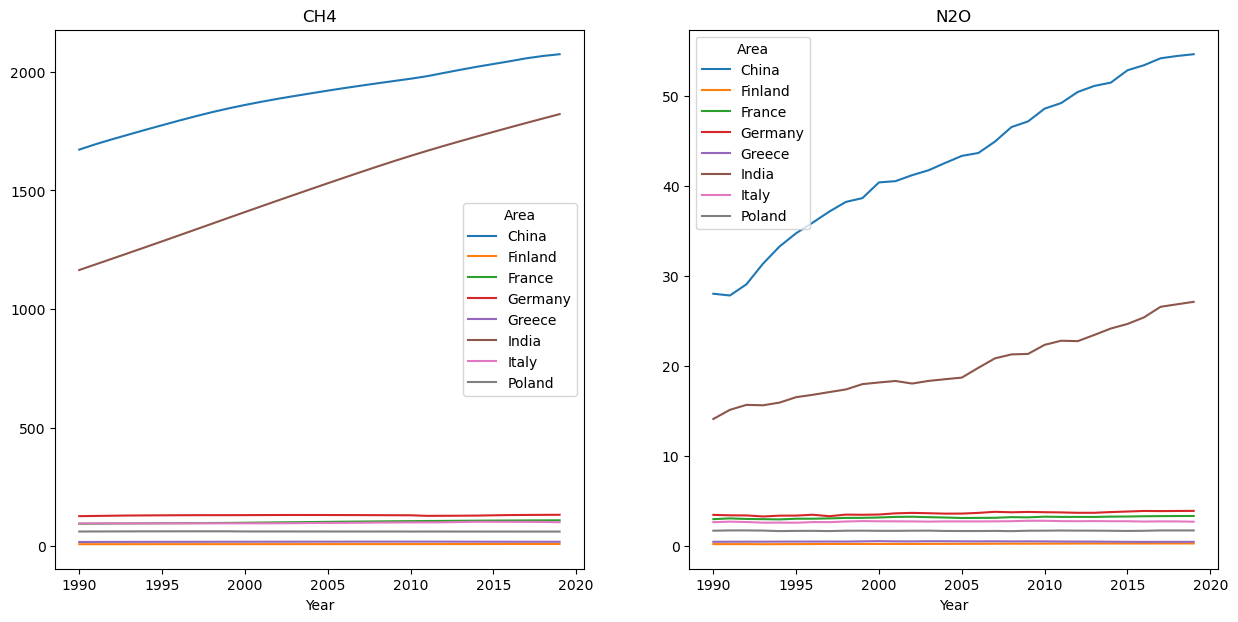

In [106]:
countries = ['France', 'Italy', 'Germany', 'Finland', 
             'Poland', 'Greece', 'India', 'China']

fr_domwaste_emiss = df.loc[(df['Area'].isin(countries))
                         & (df['Item'] == 'Domestic wastewater')]

ch4_df = fr_domwaste_emiss.loc[fr_domwaste_emiss['Element'] == 'Emissions (CH4)']
n2o_df = fr_domwaste_emiss.loc[fr_domwaste_emiss['Element'] == 'Emissions (N2O)']

ch4_df = ch4_df[['Year', 'Area', 'Value']]
n2o_df = n2o_df[['Year', 'Area', 'Value']]

ch4_df = ch4_df.pivot(index='Year', columns='Area', values='Value')
n2o_df = n2o_df.pivot(index='Year', columns='Area', values='Value')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 7))

ch4_df.plot(ax=ax1, title='CH4')
n2o_df.plot(ax=ax2, title='N2O')
plt.show()

# The plot shows the prevalence of emissions in China and India.
